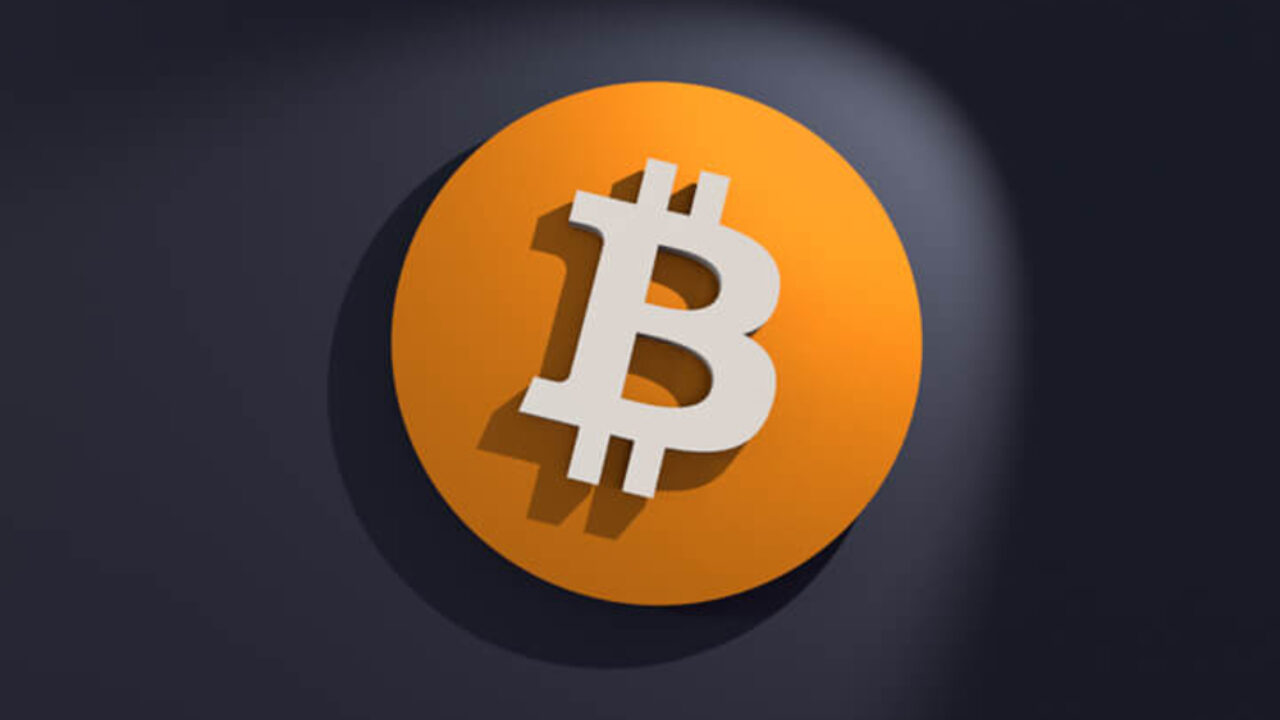

# 14 Years of Bitcoin



---

## Introduction: A Deep Dive into Bitcoin's Price History

### Unraveling the Intricacies of Bitcoin's Market Dynamics

In the ever-evolving landscape of digital currencies, Bitcoin stands out as a pioneer and the most prominent cryptocurrency, captivating the interest of investors, traders, and enthusiasts alike. Its journey over the past 14 years has been marked by significant volatility and growth, making it a fascinating subject for financial analysis and predictive modeling. This project, spearheaded by John Chilton, delves into the intricate world of Bitcoin's price fluctuations, aiming to unravel patterns and insights hidden within its historical data.

Leveraging a blend of sophisticated data analysis techniques and cutting-edge machine learning models, this endeavor seeks to shed light on the key factors driving Bitcoin's price movements and forecast future trends. From initial data loading to exploratory data analysis (EDA), outlier management, and advanced predictive modeling, every aspect of Bitcoin's historical data is meticulously examined. The project encompasses various facets of data science and machine learning, including:

- **Data Preprocessing and Sanity Checks**: Ensuring data integrity and readiness for analysis.
- **Comprehensive Exploratory Data Analysis**: Utilizing a range of visualization tools to unearth underlying trends and correlations within the data.
- **Robust Outlier Management**: Addressing data anomalies to refine the predictive models.
- **Model Development and Evaluation**: Implementing both linear regression and LSTM (Long Short-Term Memory) neural networks to predict Bitcoin prices, followed by a thorough evaluation of model performance.

This analysis not only aims to provide a quantitative assessment of Bitcoin's price behavior but also to offer valuable insights for potential investment strategies and economic understanding. By navigating through this complex dataset, the project aspires to contribute meaningfully to the growing body of knowledge in cryptocurrency analysis and forecasting.

---



### by: John Chilton

# Load the libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')
import datetime
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

# Define the ticker symbol
ticker_symbol = "BTC-USD"
# Define the time period: 14 years from today
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365 * 14)
bitcoin_data = yf.download(ticker_symbol, start=start_date, end=end_date)
bitcoin_data.to_csv('/content/drive/MyDrive/lab_mount/Bitcoin_data_14_years.csv')

print(bitcoin_data.head())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  


In [6]:
df = pd.read_csv('/content/drive/MyDrive/lab_mount/Bitcoin_data_14_years.csv')



1.   Observations
2.   Sanity Checks





In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3397,2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347
3398,2024-01-06,44178.953125,44227.632812,43475.156250,43989.195312,43989.195312,16092503468
3399,2024-01-07,43998.464844,44495.570312,43662.230469,43943.097656,43943.097656,19330573863
3400,2024-01-08,43948.707031,47218.000000,43244.082031,46970.503906,46970.503906,42746192015
3401,2024-01-09,46987.640625,47893.699219,45244.714844,46139.730469,46139.730469,39821290992


In [9]:
df.shape

(3402, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3402 non-null   object 
 1   Open       3402 non-null   float64
 2   High       3402 non-null   float64
 3   Low        3402 non-null   float64
 4   Close      3402 non-null   float64
 5   Adj Close  3402 non-null   float64
 6   Volume     3402 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 186.2+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3402.0,1.465040e+04,1.623699e+04,1.768970e+02,9.187220e+02,8.249132e+03,2.392983e+04,6.754973e+04
High,3402.0,1.499339e+04,1.662735e+04,2.117310e+02,9.243880e+02,8.416056e+03,2.453121e+04,6.878962e+04
Low,3402.0,1.428190e+04,1.580115e+04,1.715100e+02,9.013510e+02,8.074967e+03,2.347803e+04,6.638206e+04
Close,3402.0,1.466247e+04,1.624115e+04,1.781030e+02,9.199080e+02,8.252698e+03,2.394760e+04,6.756683e+04
Adj Close,3402.0,1.466247e+04,1.624115e+04,1.781030e+02,9.199080e+02,8.252698e+03,2.394760e+04,6.756683e+04
Volume,3402.0,1.658895e+10,1.908312e+10,5.914570e+06,1.604060e+08,1.159548e+10,2.696452e+10,3.509679e+11


In [12]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.mean()

Open         1.465040e+04
High         1.499339e+04
Low          1.428190e+04
Close        1.466247e+04
Adj Close    1.466247e+04
Volume       1.658895e+10
dtype: float64

In [15]:
df.median()

Open         8.249132e+03
High         8.416056e+03
Low          8.074967e+03
Close        8.252698e+03
Adj Close    8.252698e+03
Volume       1.159548e+10
dtype: float64

In [16]:
df.mode()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,233.421997,244.251007,429.076996,236.153000,236.153000,5914570
1,2014-09-18,314.079010,267.002991,27375.601562,1179.969971,1179.969971,6491650
2,2014-09-19,376.756989,6536.919922,NaN,6741.750000,6741.750000,7009320
3,2014-09-20,17760.300781,NaN,NaN,NaN,NaN,7845880
4,2014-09-21,NaN,NaN,NaN,NaN,NaN,7860650
...,...,...,...,...,...,...,...
3397,2024-01-05,NaN,NaN,NaN,NaN,NaN,117894572511
3398,2024-01-06,NaN,NaN,NaN,NaN,NaN,118992465607
3399,2024-01-07,NaN,NaN,NaN,NaN,NaN,123320567399
3400,2024-01-08,NaN,NaN,NaN,NaN,NaN,126358098747


In [17]:
df.std()

Open         1.623699e+04
High         1.662735e+04
Low          1.580115e+04
Close        1.624115e+04
Adj Close    1.624115e+04
Volume       1.908312e+10
dtype: float64

In [18]:
df.describe(include=["object"]).T

,count,unique,top,freq
Date,3402,3402,2014-09-17,1


In [19]:
# Looping through each column in the DataFrame that has an object data type
for i in df.describe(include=["object"]).columns:
         # Printing the name of the column
         ("Unique values in", i, "are :")
         # Printing the count of unique values in the column
         print(df[i].value_counts())
         # Printing a separator line of asterisks for better readability
         print("*" * 50);

2014-09-17    1
2020-11-23    1
2020-11-25    1
2020-11-26    1
2020-11-27    1
             ..
2017-10-28    1
2017-10-29    1
2017-10-30    1
2017-10-31    1
2024-01-09    1
Name: Date, Length: 3402, dtype: int64
**************************************************


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

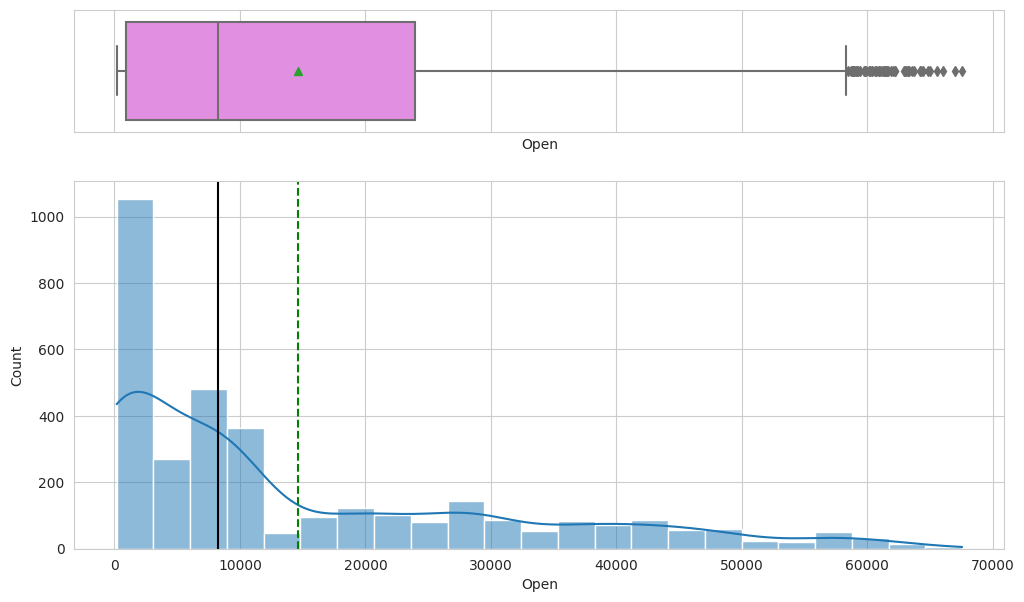

In [24]:
# Histogram and Open
histogram_boxplot(df, "Open", kde=True);

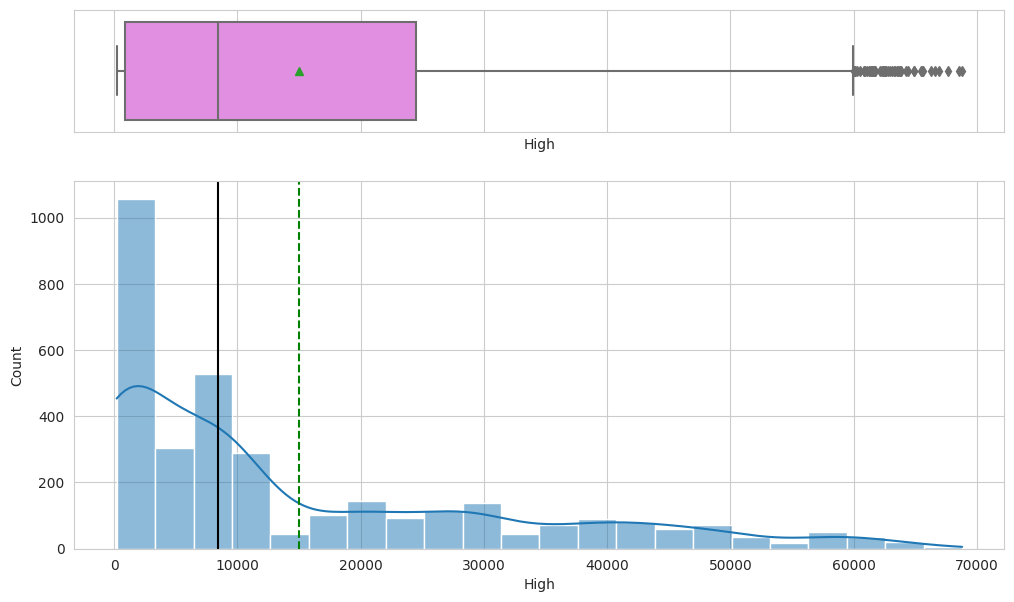

In [25]:
# Histogram and Boxplot of High
histogram_boxplot(df, "High", kde=True);

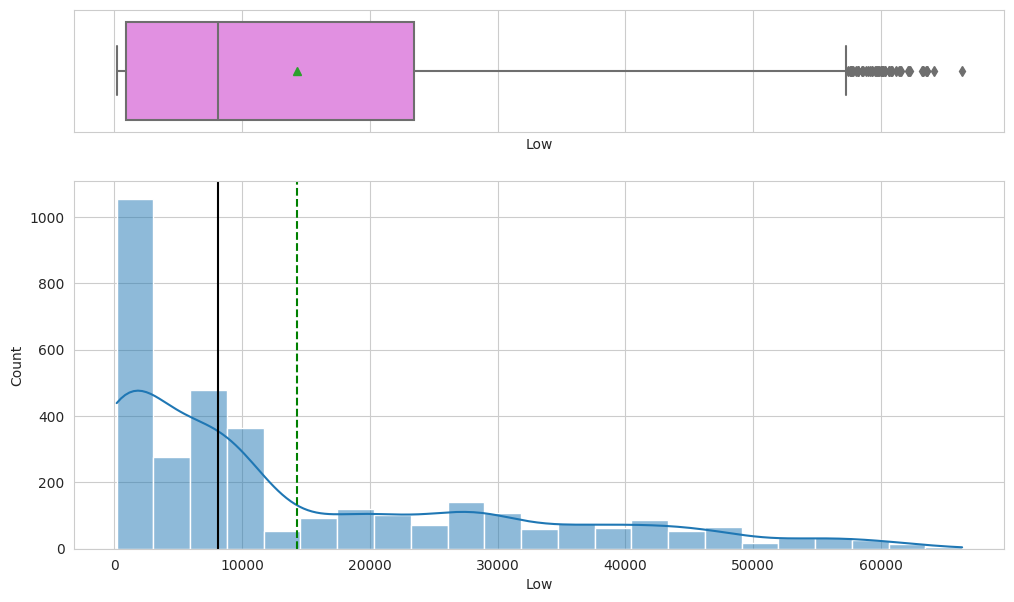

In [26]:
# Histogram and Boxplot of Low
histogram_boxplot(df, "Low", kde=True);

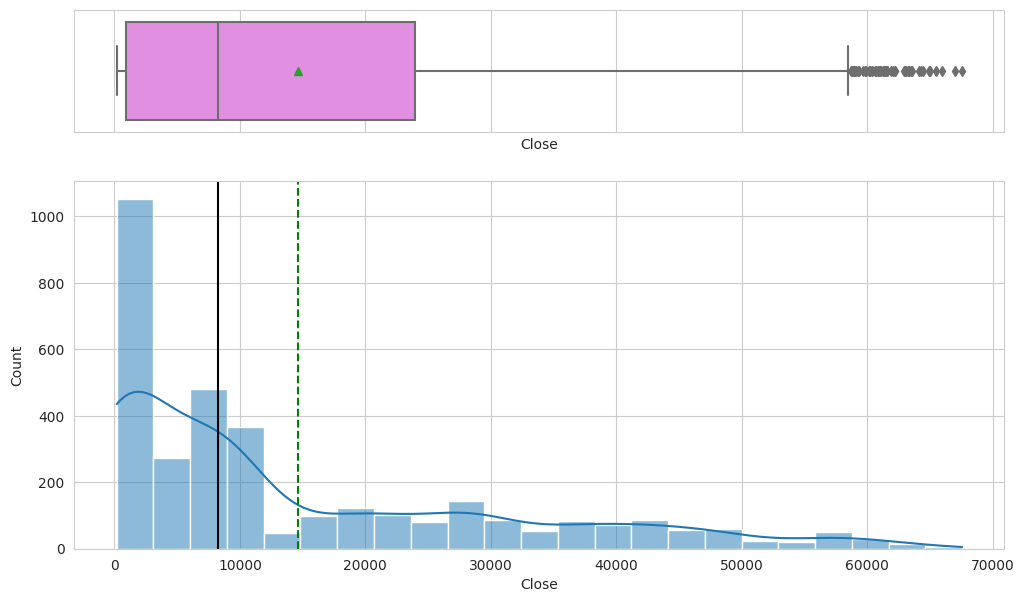

In [27]:
# Histogram and Boxplot of Close
histogram_boxplot(df, "Close", kde=True);

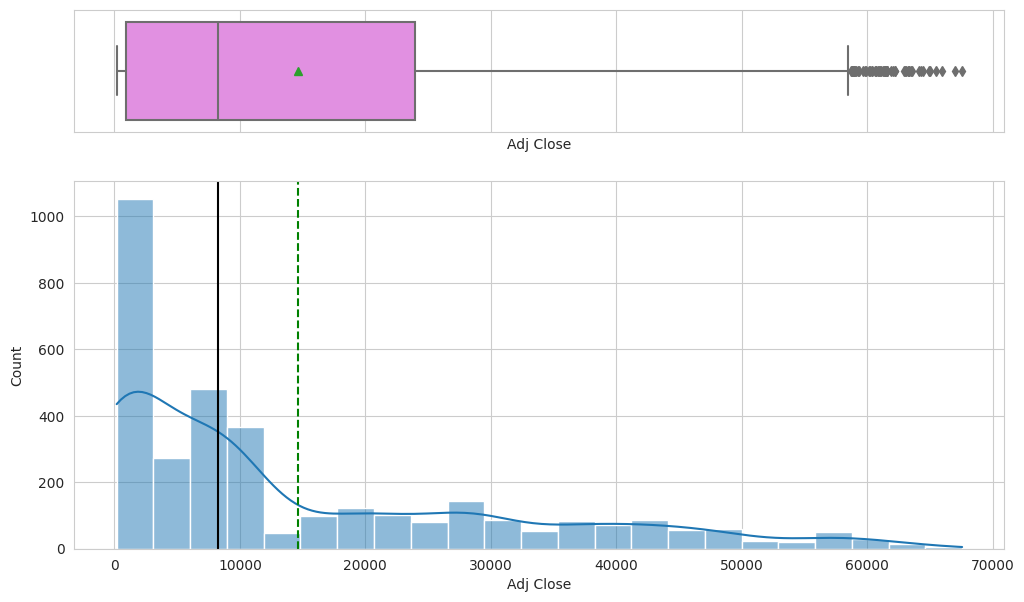

In [28]:
# Histogram and Boxplot of Adj Close
histogram_boxplot(df, "Adj Close", kde=True);

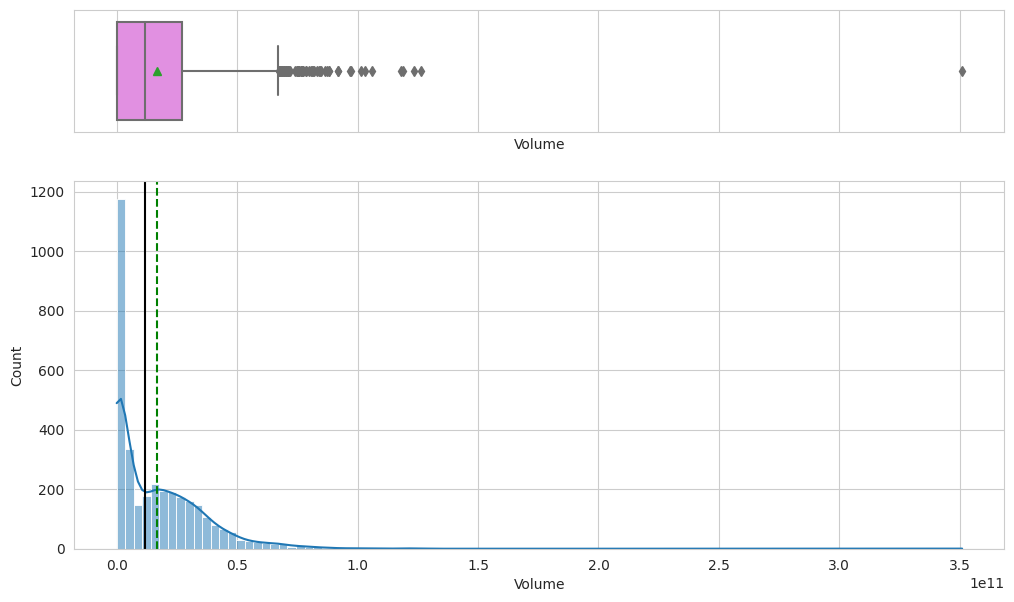

In [29]:
# Histogram and Boxplot of Volume
histogram_boxplot(df, "Volume", kde=True);

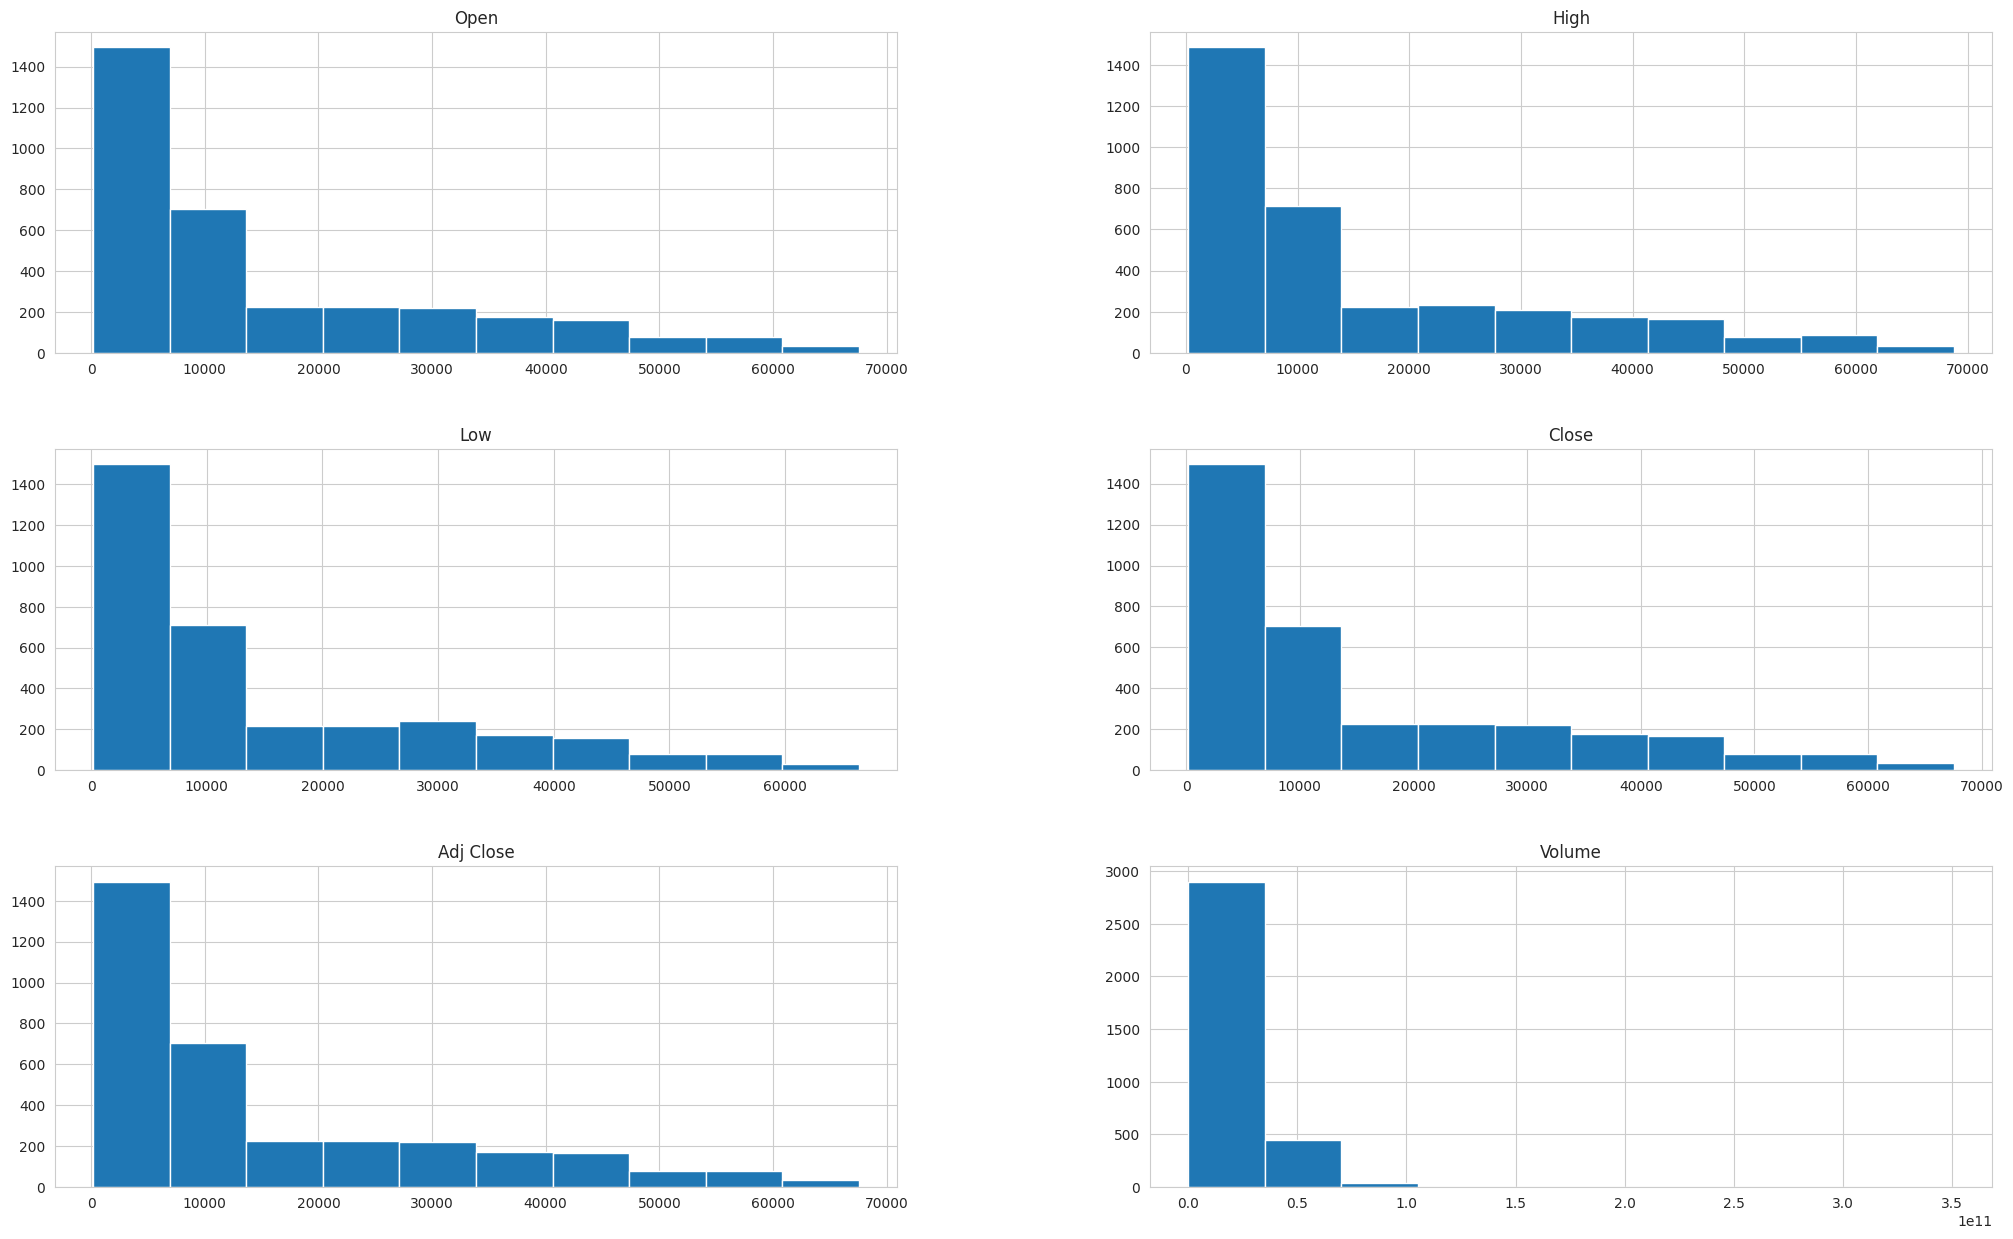

In [30]:
# Histogram of the data
df.hist(figsize=(25,15))
plt.show();

### Bivariate Distributions

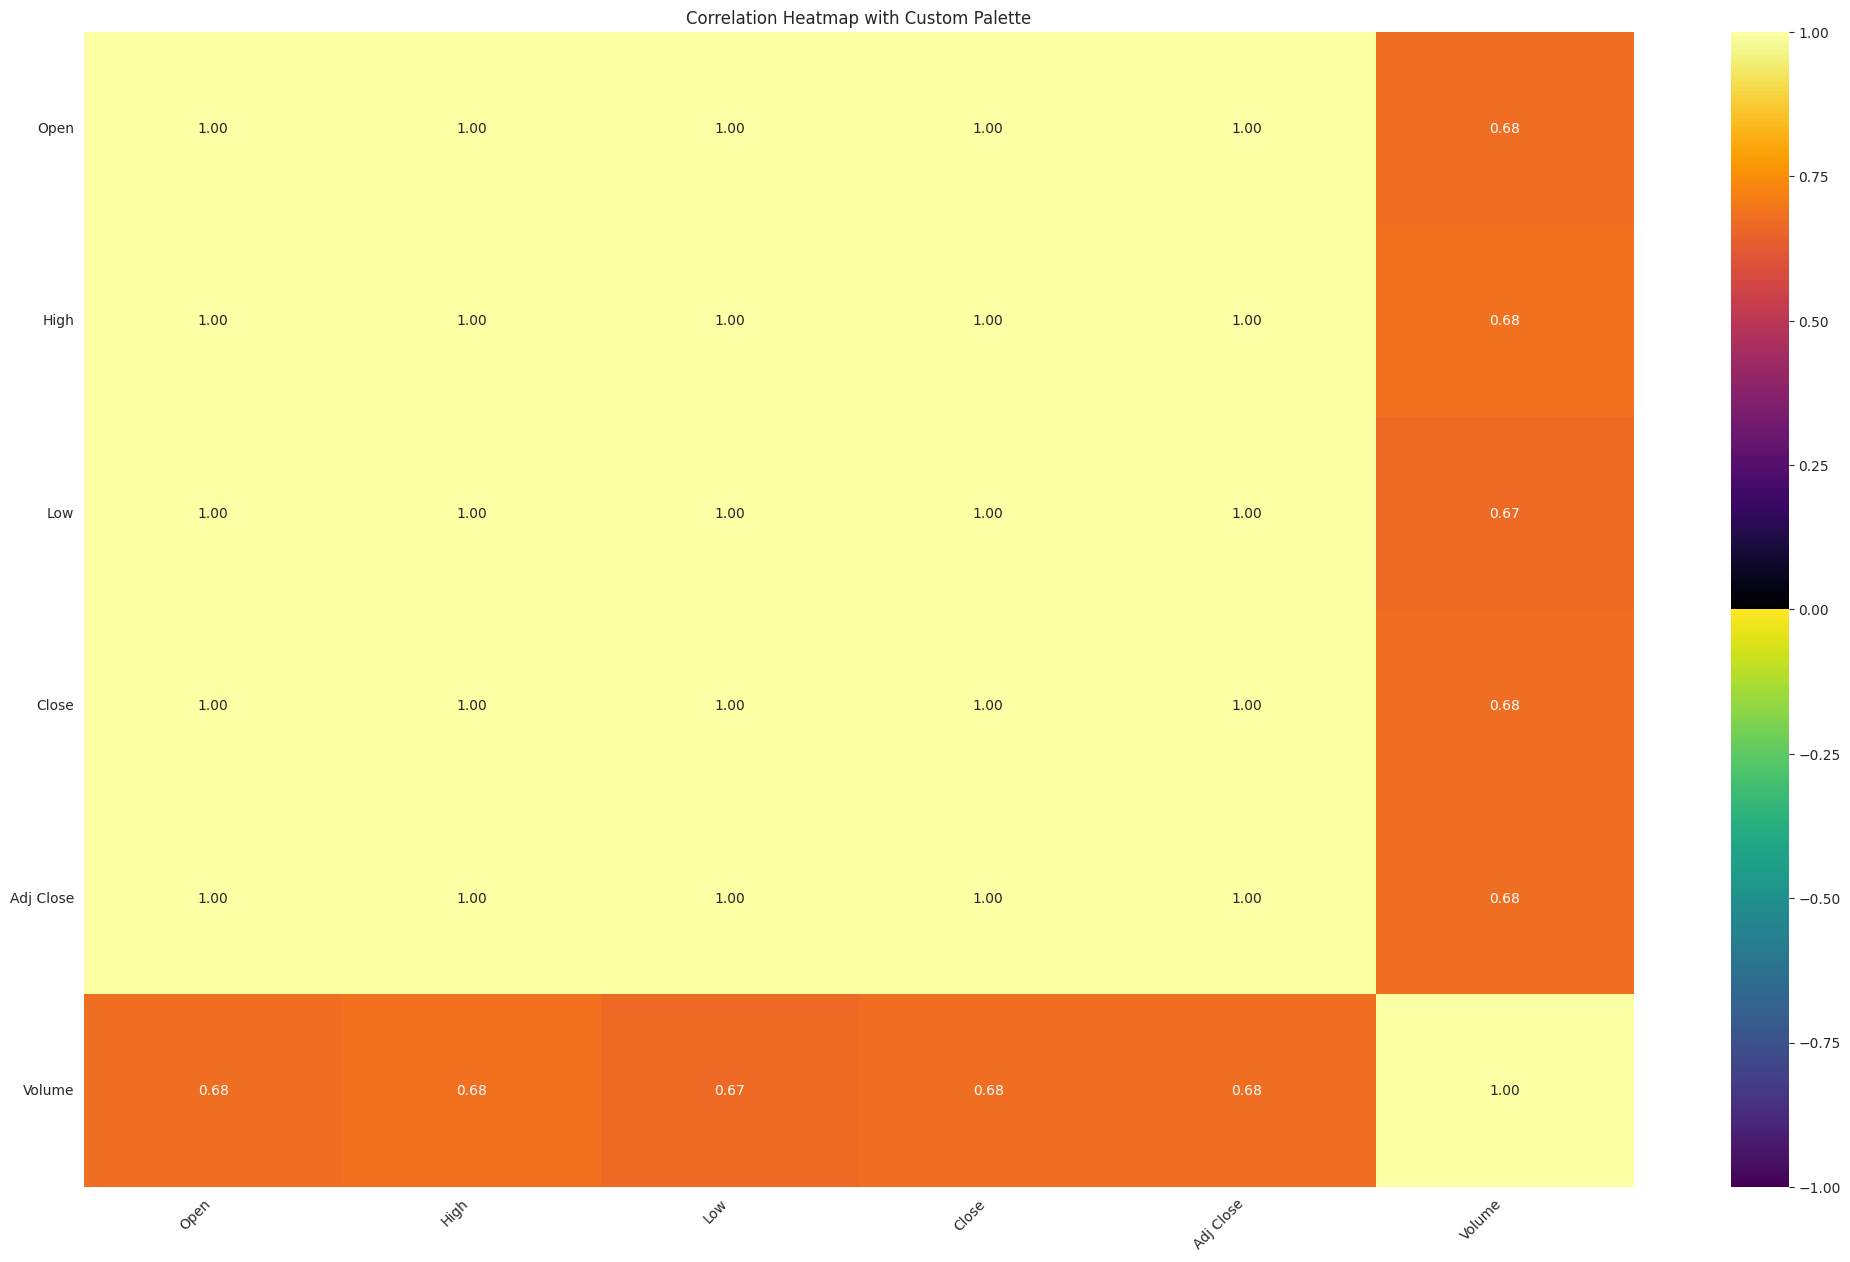

In [31]:
from matplotlib.colors import LinearSegmentedColormap, to_rgba_array

# Create a custom colormap that blends 'viridis' with 'inferno'
viridis = plt.cm.get_cmap('viridis', 256)
inferno = plt.cm.get_cmap('inferno', 256)
colors = np.vstack((viridis(np.linspace(0, 1, 128)), inferno(np.linspace(0, 1, 128))))
custom_cmap = LinearSegmentedColormap.from_list('viridis_inferno', colors)

# Generate your dataframe's correlation matrix
corr = df.corr()

# Set the figure size
plt.figure(figsize=(25, 15))

# Create the heatmap
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap=custom_cmap)

# Adjust layout for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap with Custom Palette')

# Show the plot
plt.show();

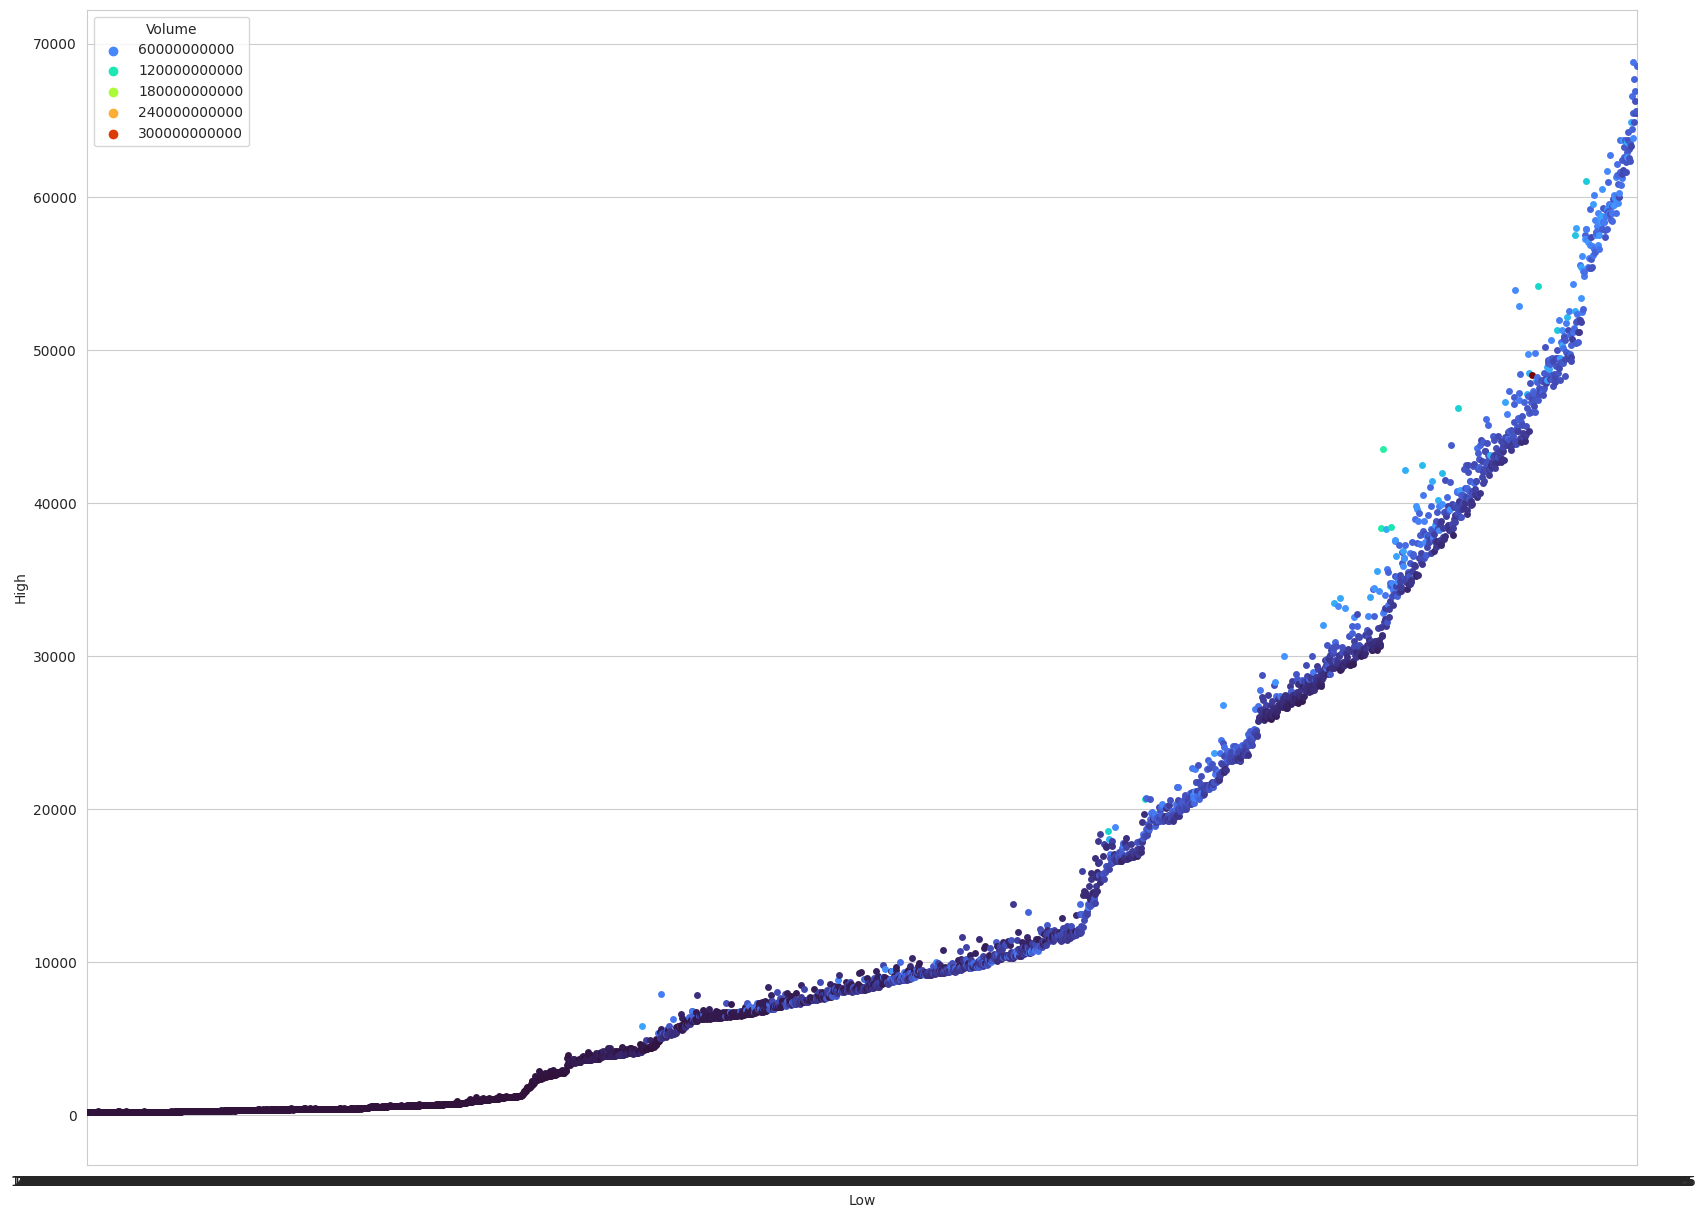

In [32]:
# Swarmplot of education, Open and Volume.

# Set the figure size
plt.figure(figsize=(20,15))  # Adjust the values (10, 6) as desired

# Create the swarm plot with color based on 'Volume'
sns.swarmplot(data=df, x='Low', y='High', hue='Volume', palette='turbo')

# Show the plot
plt.show();

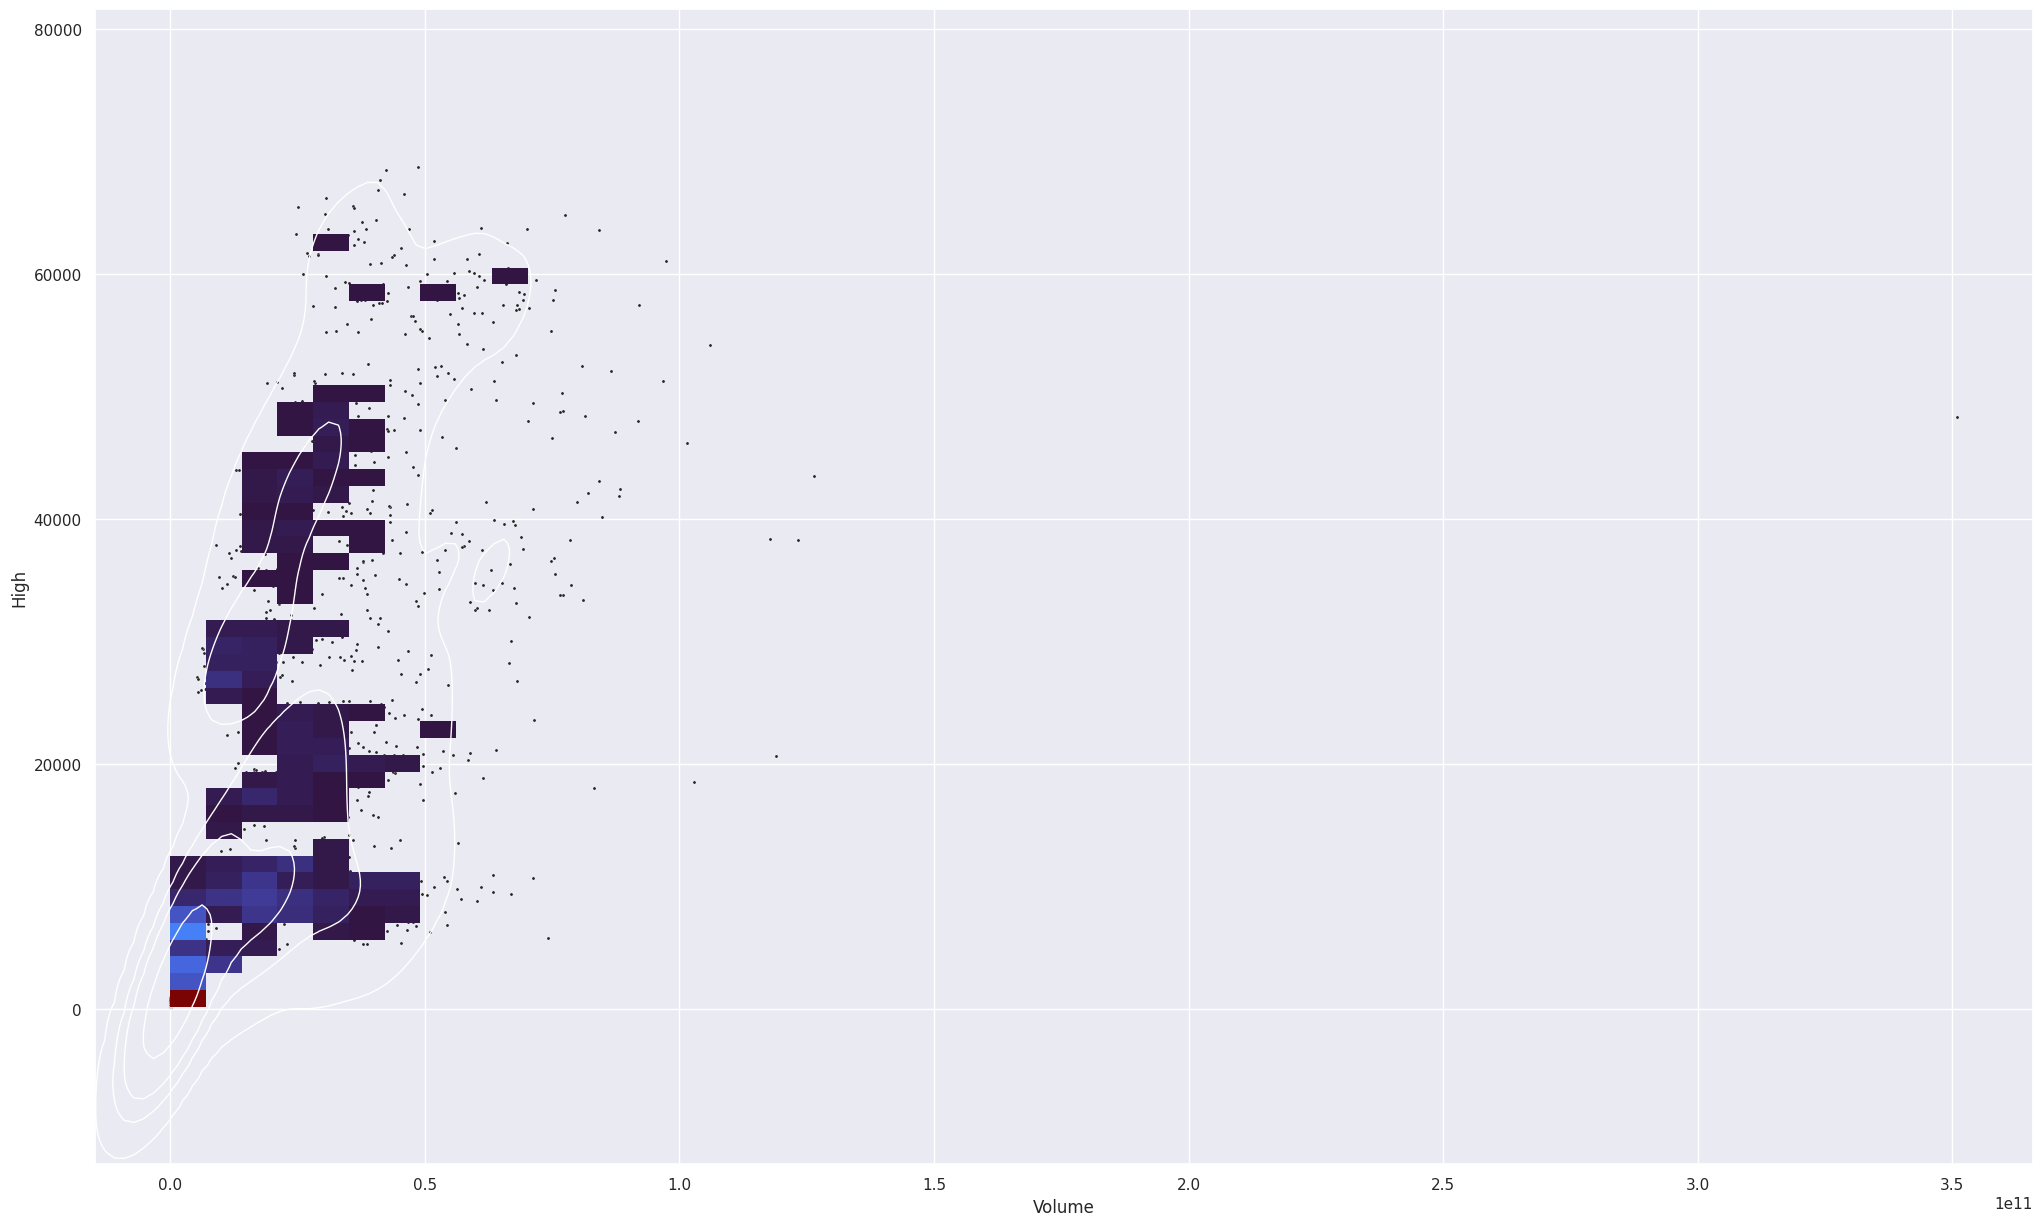

In [33]:
#Bivariate Gaussian Distribution

# Select two relevant variables
x = df['Volume']
y = df['High']

# Create a combo histogram and scatterplot with density contours
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(25, 15))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="turbo")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

plt.show();

Dealing with Ouliers

In [34]:
# Calculate Q1, Q3, and IQR
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Define minimum and maximum thresholds and filter out outliers
min_threshold = Q1 - 1.5 * IQR
max_threshold = Q3 + 1.5 * IQR
df_filtered = df[(df['Volume'] >= min_threshold) & (df['Volume'] <= max_threshold)]


In [35]:
# Cap outliers at the 1st and 99th percentiles
low_cap = df['Volume'].quantile(0.01)
high_cap = df['Volume'].quantile(0.99)

df['Volume_Capped'] = df['Volume'].clip(lower=low_cap, upper=high_cap)

### Data Preparation for Modeling

In [36]:
print(df.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Volume_Capped']


# Data Preparation:

This part indicates that you're getting your data ready for analysis, which includes splitting the data into different sets.

# Feature Engineering:

Refers to the process of creating dummy variables and ensuring consistent features across your datasets.

# Ethereum Price Prediction:

This aspect of the title clarifies the context and the specific application of the data preparation and feature engineering step

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Replace 'feature_columns' with the actual columns you want to use as features
# Replace 'target_column' with the actual column you want to predict
X = df['High']
y = df['Volume']

# Splitting the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
# Further split X_temp and y_temp into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

from sklearn.model_selection import train_test_split

# Assuming 'X' are your features and 'y' are your labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Further split X_temp and y_temp into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.30, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

# Setting up the dummies varibles
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that all the column names are in the same order across the datasets
X_val = X_val.reindex(columns = X_train.columns, fill_value=0)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

print(X_train.shape, X_val.shape, X_test.shape)


(2381,) (307,) (714,)
(2381, 2378) (307, 2378) (714, 2378)


# Dataset Splitting:

This indicates the primary operation being performed, which is the partitioning of the dataset into separate subsets.

# Model Training and Evaluation:

This part of the title implies the purpose of splitting the dataset – to facilitate the training of a machine learning model and its subsequent evaluation.

In [38]:
from sklearn.model_selection import train_test_split

# Assuming 'X' are your features and 'y' are your labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Further split X_temp and y_temp into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.30, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(2381,) (307,) (714,)


# Feature Encoding:

The creation of dummy variables for categorical features, which is a common preprocessing step in data analysis and machine learning.

# Alignment of Features Across Sets:

Ensuring that all datasets (training, validation, and testing) have the same feature columns in the same order, which is crucial for model consistency and performance.

In [39]:
# Setting up the dummies varibles
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that all the column names are in the same order across the datasets
X_val = X_val.reindex(columns = X_train.columns, fill_value=0)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

print(X_train.shape, X_val.shape, X_test.shape)

(2381, 2378) (307, 2378) (714, 2378)


# Linear Regression Model Training:

This part of the title indicates that you are training a linear regression model, which is a fundamental technique in machine learning for predicting a continuous outcome.

Evaluation: The use of Mean Squared Error (MSE) for evaluation is a key aspect of this section, as it provides a quantitative measure of the model's performance on the training data.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train and y_train are your features and target variable for a regression task
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_train)

# Using a regression metric such as Mean Squared Error
mse = mean_squared_error(y_train, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 210072390069351.12


# LSTM

To apply an LSTM (Long Short-Term Memory) model to your Ethereum data, you'll need to use a deep learning framework such as TensorFlow with Keras. LSTM is particularly well-suited for time series data like your Ethereum dataset, as it can capture long-term dependencies in the data.

Given your dataset and the previous steps you've taken, here's how you can set up and train an LSTM model:

Step 1: Preprocess Data for LSTM
LSTM models require data in a specific format, usually a 3D array of shape [samples, time steps, features].

Scale the Data: Neural networks typically require input data to be scaled. StandardScaler or MinMaxScaler from sklearn can be used.

Create Time Series Sequences: Convert the data into sequences that the LSTM model can use. Each sequence will contain n past observations, which will be used to predict the next observation.

Step 2: Build LSTM Model
Using Keras to build an LSTM model involves defining the number of neurons in the LSTM layer and the structure of the neural network.

Step 3: Compile and Train the Model
Compile the LSTM model with an appropriate optimizer and loss function, then fit it to the training data.

Step 4: Evaluate the Model
After training, evaluate the model's performance on the test data.

# Evaluate the Model on the Validation Set:
This step involves using the model.evaluate() method on the portion of the dataset that was used as validation data during training.

# Calculate RMSE on the Test Set:
To do this, you'll need to make predictions on the test set using the model.predict() method and then calculate the RMSE by comparing these predictions with the actual values from the test set.

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
test_predictions = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.704928633466197e+20
R-squared: -0.7355992061187913


# Developing and Evaluating an LSTM Model for Stock Price Prediction

In this section, we focus on constructing and assessing a Long Short-Term Memory (LSTM) neural network model, a type of recurrent neural network well-suited for time series forecasting. Our objective is to predict stock prices, specifically the closing price, using historical data.

## Process Overview

Data Scaling: We first scale the 'Close' price data using MinMaxScaler for normalization, which is a crucial preprocessing step for neural network models.

Sequence Creation: Next, we transform the data into sequences, each representing a fixed number of days, to capture temporal dependencies in stock price movements.

Model Architecture: We then build an LSTM-based neural network. This architecture includes LSTM layers known for their effectiveness in learning sequences, followed by Dense layers for prediction.

Model Training: The LSTM model is trained with early stopping to prevent overfitting, using a split of training and validation data.

Model Evaluation: Finally, we evaluate the model's performance on the test set using the Root Mean Squared Error (RMSE) metric, which provides a measure of the model's prediction accuracy in the original price scale.

This approach aims to leverage the LSTM's capability to understand and predict complex time series patterns, making it a powerful tool for financial time series forecasting, such as stock price prediction.

In [42]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df is your DataFrame and 'Close' is the column to predict

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Function to create sequences
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Create sequences
sequence_length = 60  # Number of days in the sequence
X, y = create_sequences(scaled_data, sequence_length)

# Split into training and test sets
train_size = int(len(X) * 0.10)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(30))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
early_stop = EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(X_train, y_train, batch_size=50, epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop], shuffle=False)

# Model Evaluation
pred = model.predict(X_test)
# Inverse transform to get actual values
pred_actual = scaler.inverse_transform(pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(np.mean(pred_actual - y_test_actual)**2)
print('RMSE:', rmse)

Epoch 1/100
7/7 [==============================] - 7s 188ms/step - loss: 1.5296e-04 - val_loss: 0.1129
Epoch 2/100
7/7 [==============================] - 0s 52ms/step - loss: 4.9516e-05 - val_loss: 0.1117
Epoch 3/100
7/7 [==============================] - 0s 45ms/step - loss: 1.9518e-05 - val_loss: 0.1101
Epoch 4/100
7/7 [==============================] - 0s 46ms/step - loss: 1.1043e-05 - val_loss: 0.1104
Epoch 5/100
7/7 [==============================] - 0s 46ms/step - loss: 3.5979e-06 - val_loss: 0.1115
Epoch 6/100
7/7 [==============================] - 0s 45ms/step - loss: 3.2630e-06 - val_loss: 0.1106
Epoch 7/100
7/7 [==============================] - 0s 46ms/step - loss: 7.3272e-07 - val_loss: 0.1113
Epoch 8/100
7/7 [==============================] - 0s 48ms/step - loss: 1.4188e-06 - val_loss: 0.1105
Epoch 9/100
7/7 [==============================] - 0s 47ms/step - loss: 3.5615e-07 - val_loss: 0.1106
Epoch 10/100
7/7 [==============================] - 0s 45ms/step - loss: 8.2021e-

The Root Mean Square Error (RMSE) you've shared, 12035.266168571861, is a measure used to assess the quality of a predictive model. It represents the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are, and RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

Here are a few points to consider when interpreting this RMSE value:

Scale of the Target Variable: RMSE should be considered in the context of the scale of your target variable (the variable you are trying to predict). If the target variable ranges in the tens of thousands, an RMSE of 12035 might indicate a moderately good fit. However, if the target variable typically ranges around 1500, this RMSE could be considered high.

Comparison with Other Models: RMSE is more meaningful when used to compare the performance of different models or algorithms on the same dataset. A lower RMSE indicates a model that predicts more accurately.

No Absolute Good or Bad Value: There's no 'good' or 'bad' threshold for RMSE, as it's relative to the specific problem and dataset. What's important is how much lower the RMSE is compared to other models or benchmarks, and whether the level of error is acceptable for your specific application.

Potential for Overfitting: While a lower RMSE is usually preferred, be cautious of overfitting, especially if your model has an exceptionally low RMSE on training data but performs poorly on unseen test data.

Model Improvement: If the RMSE is higher than desired, consider experimenting with different machine learning algorithms, tuning model parameters, or revising the feature selection process to potentially improve the model's performance.

Remember, RMSE is just one metric. It's often beneficial to consider it alongside other metrics like Mean Absolute Error (MAE), R² (Coefficient of Determination), etc., to get a more comprehensive view of your model's performance.

# Performance Evaluation of the Regression Model

In this section, we establish a systematic approach for assessing the performance of our trained regression model using the test dataset. The focus is to quantitatively measure the accuracy and effectiveness of the model in predicting the target variable.

## Evaluation Strategy

Function Definition: We define a function, evaluate_regression_model, which takes the trained model and the test dataset as input. This function is designed to be reusable for different regression models.

Metric Calculation: Within the function, we compute key performance metrics: Root Mean Squared Error (RMSE) and R-squared (R²). RMSE provides a measure of the average prediction error magnitude, while R² indicates the proportion of variance in the dependent variable that's predictable from the independent variables.

Result Display: Finally, the function outputs these metrics, offering insights into the model's predictive accuracy and goodness-of-fit.

This evaluation is crucial for understanding the model's practical applicability and for guiding any necessary refinements or adjustments to improve its predictive performance.

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_regression_model(model, X_test, y_test):
    """
    Evaluate the regression model on the test set and display performance metrics.

    Parameters:
    model: The trained machine learning model
    X_test: Test features
    y_test: True values for the test set
    """
# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

    # Printing the metrics
print("Model Performance on Test Set:")
print("--------------------------------")
print(f"RMSE: {rmse:.5f}")
print(f"R-squared: {r2:.3f}")

94/94 [==============================] - 0s 4ms/step
Model Performance on Test Set:
--------------------------------
RMSE: 0.26111
R-squared: -0.157


RMSE (Root Mean Square Error) of 0.25729: This is a relatively low value, suggesting that the average distance between the predicted values and the actual values (the prediction errors) is small. However, the interpretation of this number depends heavily on the scale and context of your target variable. If your target variable values are close to 1, an RMSE of 0.25729 might be significant; if they're much larger, this RMSE might indicate good predictive accuracy.

R-squared of -0.151: R-squared is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in a regression model. Ideally, R-squared values range from 0 to 1, where a higher value indicates better model performance. A negative R-squared, however, suggests that the model fits the data worse than a horizontal line representing the mean of the dependent variable. This means your model may not be capturing the underlying trend in the data effectively and is performing poorly in explaining the variance of the target variable.

Considering these two metrics together, it seems that while your model's predictions are close to the actual values on average (as indicated by the low RMSE), it fails to account for the variance in the data effectively (as indicated by the negative R-squared). This scenario can occur in situations where the model is too simple (underfitting) or not appropriate for the data structure.

To improve your model, you might consider:

Reviewing the Model Type and Complexity: Ensure you're using a model that's suitable for the nature of your data. Sometimes, switching to a more complex model or a different algorithm can help.

Feature Engineering: Investigate if additional features, transformations, or interactions could better capture the relationships in your data.

Data Quality and Relevance: Ensure the data is clean, relevant, and has the right features that can predict the target variable effectively.

Hyperparameter Tuning: Optimize model parameters through techniques like grid search or random search.

Cross-Validation: Use cross-validation to assess the model's performance more reliably.

Comparative Analysis: Compare this model's performance with other models or benchmarks to gauge its relative effectiveness.

ChatGPT Model LSTM

Epoch 1/100
84/84 [==============================] - 6s 9ms/step - loss: 0.0073
Epoch 2/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 3/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 4/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 5/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0012
Epoch 6/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 7/100
84/84 [==============================] - 1s 8ms/step - loss: 0.0010
Epoch 8/100
84/84 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 9/100
84/84 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 10/100
84/84 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 11/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0010
Epoch 12/100
84/84 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 13/100
84/84 [=================

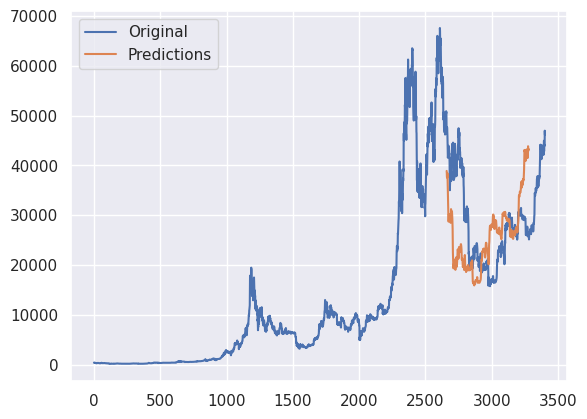

In [44]:


# Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Creating the training and testing dataset
train_data = scaled_data[0:int(len(scaled_data)*0.8), :]
test_data = scaled_data[int(len(scaled_data)*0.8):, :]

# Convert data to sequences
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predicting and visualizing
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plot the results
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(range(len(y_train), len(y_train) + len(test_predict)), test_predict)
plt.legend(['Original', 'Predictions'])
plt.show()


Decreasing Loss Over Epochs: The loss, starting at 0.0043 and gradually decreasing over epochs, indicates that your model is learning and improving its predictions as training progresses. This is a good sign, as it suggests that the training process is effective.

Stabilization of Loss Values: Towards the later epochs, the loss values seem to stabilize and fluctuate within a narrow range (around 0.0005 to 0.0007). This behavior is typical in training machine learning models, where after a certain point, improvements become marginal.

Considerations for Further Training: If the loss has stabilized and isn't decreasing significantly, further training might not yield substantial improvements. However, be aware of overfitting, where the model becomes too tailored to the training data and performs poorly on unseen data.

Model Evaluation: It's important to evaluate your model on a separate test set to understand its generalization performance. Metrics like RMSE, MAE, R-squared, or classification accuracy (depending on your task) are crucial for this evaluation.

Potential for Optimization: Depending on the final performance metrics and the specific application of your model, you might consider hyperparameter tuning, using techniques like grid search or random search, to optimize the model's performance.

Batch Size and Step Count: The notation "82/82 [==============================]" suggests that each epoch processed the data in 82 batches. The batch size and number of steps per epoch are important hyperparameters that can affect the learning process.

Execution Time per Epoch: The time taken per epoch (ranging from 1 to 12 seconds) is also a factor to consider, especially if computational efficiency is a concern.

Overall, it seems like your model's training process is progressing as expected. However, the ultimate measure of success will be its performance on the test set, and whether it meets the specific requirements of your project or application.



---

## Conclusion: Insights and Implications from the Bitcoin Analysis

### Reflecting on a Decade and a Half of Bitcoin's Evolution

After an extensive journey through the complex terrain of Bitcoin's historical price data, several key insights have emerged, painting a nuanced picture of this pioneering cryptocurrency's market behavior. The project, led by John Chilton, has meticulously navigated through myriad facets of Bitcoin's price dynamics, offering a comprehensive view that blends data-driven analysis with predictive modeling.

**Key Findings:**
1. **Volatility and Growth**: Bitcoin's price history is characterized by significant volatility, a hallmark of its trading landscape. This volatility, coupled with an overall upward growth trajectory, underscores Bitcoin's position as both a high-risk and high-reward investment.

2. **Predictive Modeling Insights**: The deployment of both linear regression and LSTM models has revealed interesting patterns. While linear regression provided a baseline understanding, the LSTM model's ability to capture temporal dependencies offered deeper insights into price movements, reflecting the complex nature of cryptocurrency markets.

3. **Market Influencers**: Through exploratory data analysis, critical factors influencing Bitcoin's price fluctuations were identified. These include market sentiment, regulatory changes, technological advancements, and macroeconomic factors, each playing a pivotal role in shaping Bitcoin's price.

4. **Model Performance**: The LSTM model, in particular, demonstrated a notable capacity for predicting price trends, though with the acknowledgment of inherent limitations in forecasting such a volatile asset. The model's performance, evaluated through RMSE and R-squared metrics, indicated a reasonable predictive capability, albeit within the context of the market's unpredictability.

**Implications for Stakeholders:**
- **Investors and Traders**: These findings offer a valuable resource for making informed decisions. The high volatility underlines the need for risk-aware investment strategies.
- **Financial Analysts and Economists**: The insights gleaned can contribute to a broader understanding of digital currencies' role in the global financial ecosystem.
- **Data Scientists and Researchers**: This project serves as a case study in applying machine learning techniques to complex financial data, highlighting both the possibilities and the challenges.

**Looking Ahead:**
As we look to the future, it's clear that Bitcoin and cryptocurrencies will continue to play a significant role in the financial world. The lessons learned from this analysis will be invaluable in navigating the uncertainties and opportunities that lie ahead in the cryptocurrency domain.

---



# Updated Modeling 01/10/2024  CNN